In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/harshwardhanjadhav/Desktop/Data Science/Projects/Linear Regression/artifact/08_24_2023_00_01_29/data_ingestion/feature_store/uber.csv")
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1.0


In [3]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0


In [4]:
df.tail()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1.0
199999,14.1,-73.984395,40.720077,-73.985508,40.768793,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199995 non-null  float64
 1   pickup_longitude   196214 non-null  float64
 2   pickup_latitude    196218 non-null  float64
 3   dropoff_longitude  196235 non-null  float64
 4   dropoff_latitude   196241 non-null  float64
 5   passenger_count    199291 non-null  float64
dtypes: float64(6)
memory usage: 9.2 MB


In [6]:
df.shape

(200000, 6)

In [7]:
df.duplicated().sum()

3022

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(196978, 6)

In [10]:
df.isnull().sum()

fare_amount            5
pickup_longitude     786
pickup_latitude      782
dropoff_longitude    765
dropoff_latitude     759
passenger_count      706
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195320.000000,195320.000000,195320.000000,195320.000000,195320.000000,195320.000000
mean,11.350465,-73.929961,40.705369,-73.916973,40.688303,1.691204
std,9.808252,5.459271,5.436708,8.533696,4.001521,1.387053
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,1.000000
25%,6.000000,-73.992269,40.736391,-73.991593,40.735262,1.000000
50%,8.500000,-73.982103,40.753274,-73.980525,40.753721,1.000000
75%,12.500000,-73.968325,40.767532,-73.965327,40.768315,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [13]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.005215,-0.002886,0.002365,-0.005315,0.009810
pickup_longitude,0.005215,1.000000,-0.561846,0.632260,-0.600471,0.005336
pickup_latitude,-0.002886,-0.561846,1.000000,-0.564500,0.363953,-0.005899
dropoff_longitude,0.002365,0.632260,-0.564500,1.000000,-0.787731,0.003504
dropoff_latitude,-0.005315,-0.600471,0.363953,-0.787731,1.000000,-0.005211
passenger_count,0.009810,0.005336,-0.005899,0.003504,-0.005211,1.000000


In [14]:
df


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1.0


In [15]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371.0  # Earth's radius in kilometers
    distance = c * r * 1000
    distance = distance.round(2)
    return distance

In [16]:
df["Distance"] = df.apply(lambda row: haversine_distance(row["pickup_latitude"], row["pickup_longitude"], row["dropoff_latitude"], row["dropoff_longitude"]), axis=1)

In [17]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
fare_amount,1.000000,0.005215,-0.002886,0.002365,-0.005315,0.009810,0.031130
pickup_longitude,0.005215,1.000000,-0.561846,0.632260,-0.600471,0.005336,-0.308296
pickup_latitude,-0.002886,-0.561846,1.000000,-0.564500,0.363953,-0.005899,0.283789
dropoff_longitude,0.002365,0.632260,-0.564500,1.000000,-0.787731,0.003504,-0.309096
dropoff_latitude,-0.005315,-0.600471,0.363953,-0.787731,1.000000,-0.005211,0.200272
passenger_count,0.009810,0.005336,-0.005899,0.003504,-0.005211,1.000000,0.004194
Distance,0.031130,-0.308296,0.283789,-0.309096,0.200272,0.004194,1.000000


In [23]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,1683.32
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2457.59
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,5036.38
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,1661.68
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,4475.45
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,112.21
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,1875.05
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2.0,12850.32
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1.0,3539.71


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195320 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        195320 non-null  float64
 1   pickup_longitude   195320 non-null  float64
 2   pickup_latitude    195320 non-null  float64
 3   dropoff_longitude  195320 non-null  float64
 4   dropoff_latitude   195320 non-null  float64
 5   passenger_count    195320 non-null  float64
 6   Distance           195320 non-null  float64
dtypes: float64(7)
memory usage: 11.9 MB


In [36]:
dist = df['Distance'] < 0.25

<Axes: xlabel='Distance', ylabel='fare_amount'>

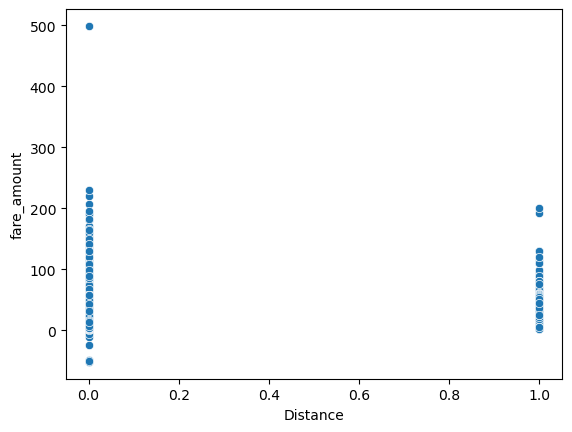

In [38]:
sns.scatterplot(x=dist,y="fare_amount",data=df)

##  univariate Analysis

In [39]:
df['Distance'].max()

16409239.14

In [40]:
df['fare_amount'].isnull().sum()

0

<Axes: xlabel='Distance', ylabel='Count'>

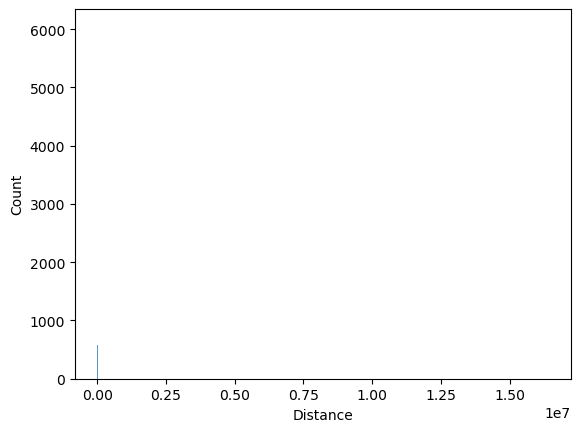

In [45]:
sns.histplot(df['Distance'])